In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [37]:
df = pd.read_csv('data.csv')
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/7/11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/7/11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,1/9/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [39]:
df.drop(['studyName','Sample Number','Region','Stage','Individual ID','Date Egg','Comments'],axis=1,inplace=True)
df

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [40]:
data=df.dropna()
data

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,No,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),Biscoe,No,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538
340,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [41]:
data['Species']=data['Species'].replace({"Adelie Penguin (Pygoscelis adeliae)":0,'Gentoo penguin (Pygoscelis papua)':1,'Chinstrap penguin (Pygoscelis antarctica)':2})
data['Island']=data['Island'].replace({'Biscoe':1,'Dream':0,'Torgersen':2})
data['Clutch Completion']=data['Clutch Completion'].replace({'Yes':1,'No':0})
data['Sex']=data['Sex'].replace({'FEMALE':0,'MALE':1})
data

/var/folders/2t/ly6f0__s5t9_w_drxr2_mvw40000gn/T/ipykernel_35475/4072156217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species']=data['Species'].replace({"Adelie Penguin (Pygoscelis adeliae)":0,'Gentoo penguin (Pygoscelis papua)':1,'Chinstrap penguin (Pygoscelis antarctica)':2})
/var/folders/2t/ly6f0__s5t9_w_drxr2_mvw40000gn/T/ipykernel_35475/4072156217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Island']=data['Island'].replace({'Biscoe':1,'Dream':0,'Torgersen':2})
/var/folders/

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,2,1,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454
2,0,2,1,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302
4,0,2,1,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426
5,0,2,1,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805
6,0,2,0,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...
338,1,1,0,47.2,13.7,214.0,4925.0,0,7.99184,-26.20538
340,1,1,1,46.8,14.3,215.0,4850.0,0,8.41151,-26.13832
341,1,1,1,50.4,15.7,222.0,5750.0,1,8.30166,-26.04117
342,1,1,1,45.2,14.8,212.0,5200.0,0,8.24246,-26.11969


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              324 non-null    int64  
 1   Island               324 non-null    int64  
 2   Clutch Completion    324 non-null    int64  
 3   Culmen Length (mm)   324 non-null    float64
 4   Culmen Depth (mm)    324 non-null    float64
 5   Flipper Length (mm)  324 non-null    float64
 6   Body Mass (g)        324 non-null    float64
 7   Sex                  324 non-null    int64  
 8   Delta 15 N (o/oo)    324 non-null    float64
 9   Delta 13 C (o/oo)    324 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 27.8 KB


In [43]:
data.to_csv('data_analysie.csv', index=False)

array([[<Axes: title={'center': 'Species'}>,
        <Axes: title={'center': 'Island'}>,
        <Axes: title={'center': 'Clutch Completion'}>],
       [<Axes: title={'center': 'Culmen Length (mm)'}>,
        <Axes: title={'center': 'Culmen Depth (mm)'}>,
        <Axes: title={'center': 'Flipper Length (mm)'}>],
       [<Axes: title={'center': 'Body Mass (g)'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Delta 15 N (o/oo)'}>],
       [<Axes: title={'center': 'Delta 13 C (o/oo)'}>, <Axes: >,
        <Axes: >]], dtype=object)

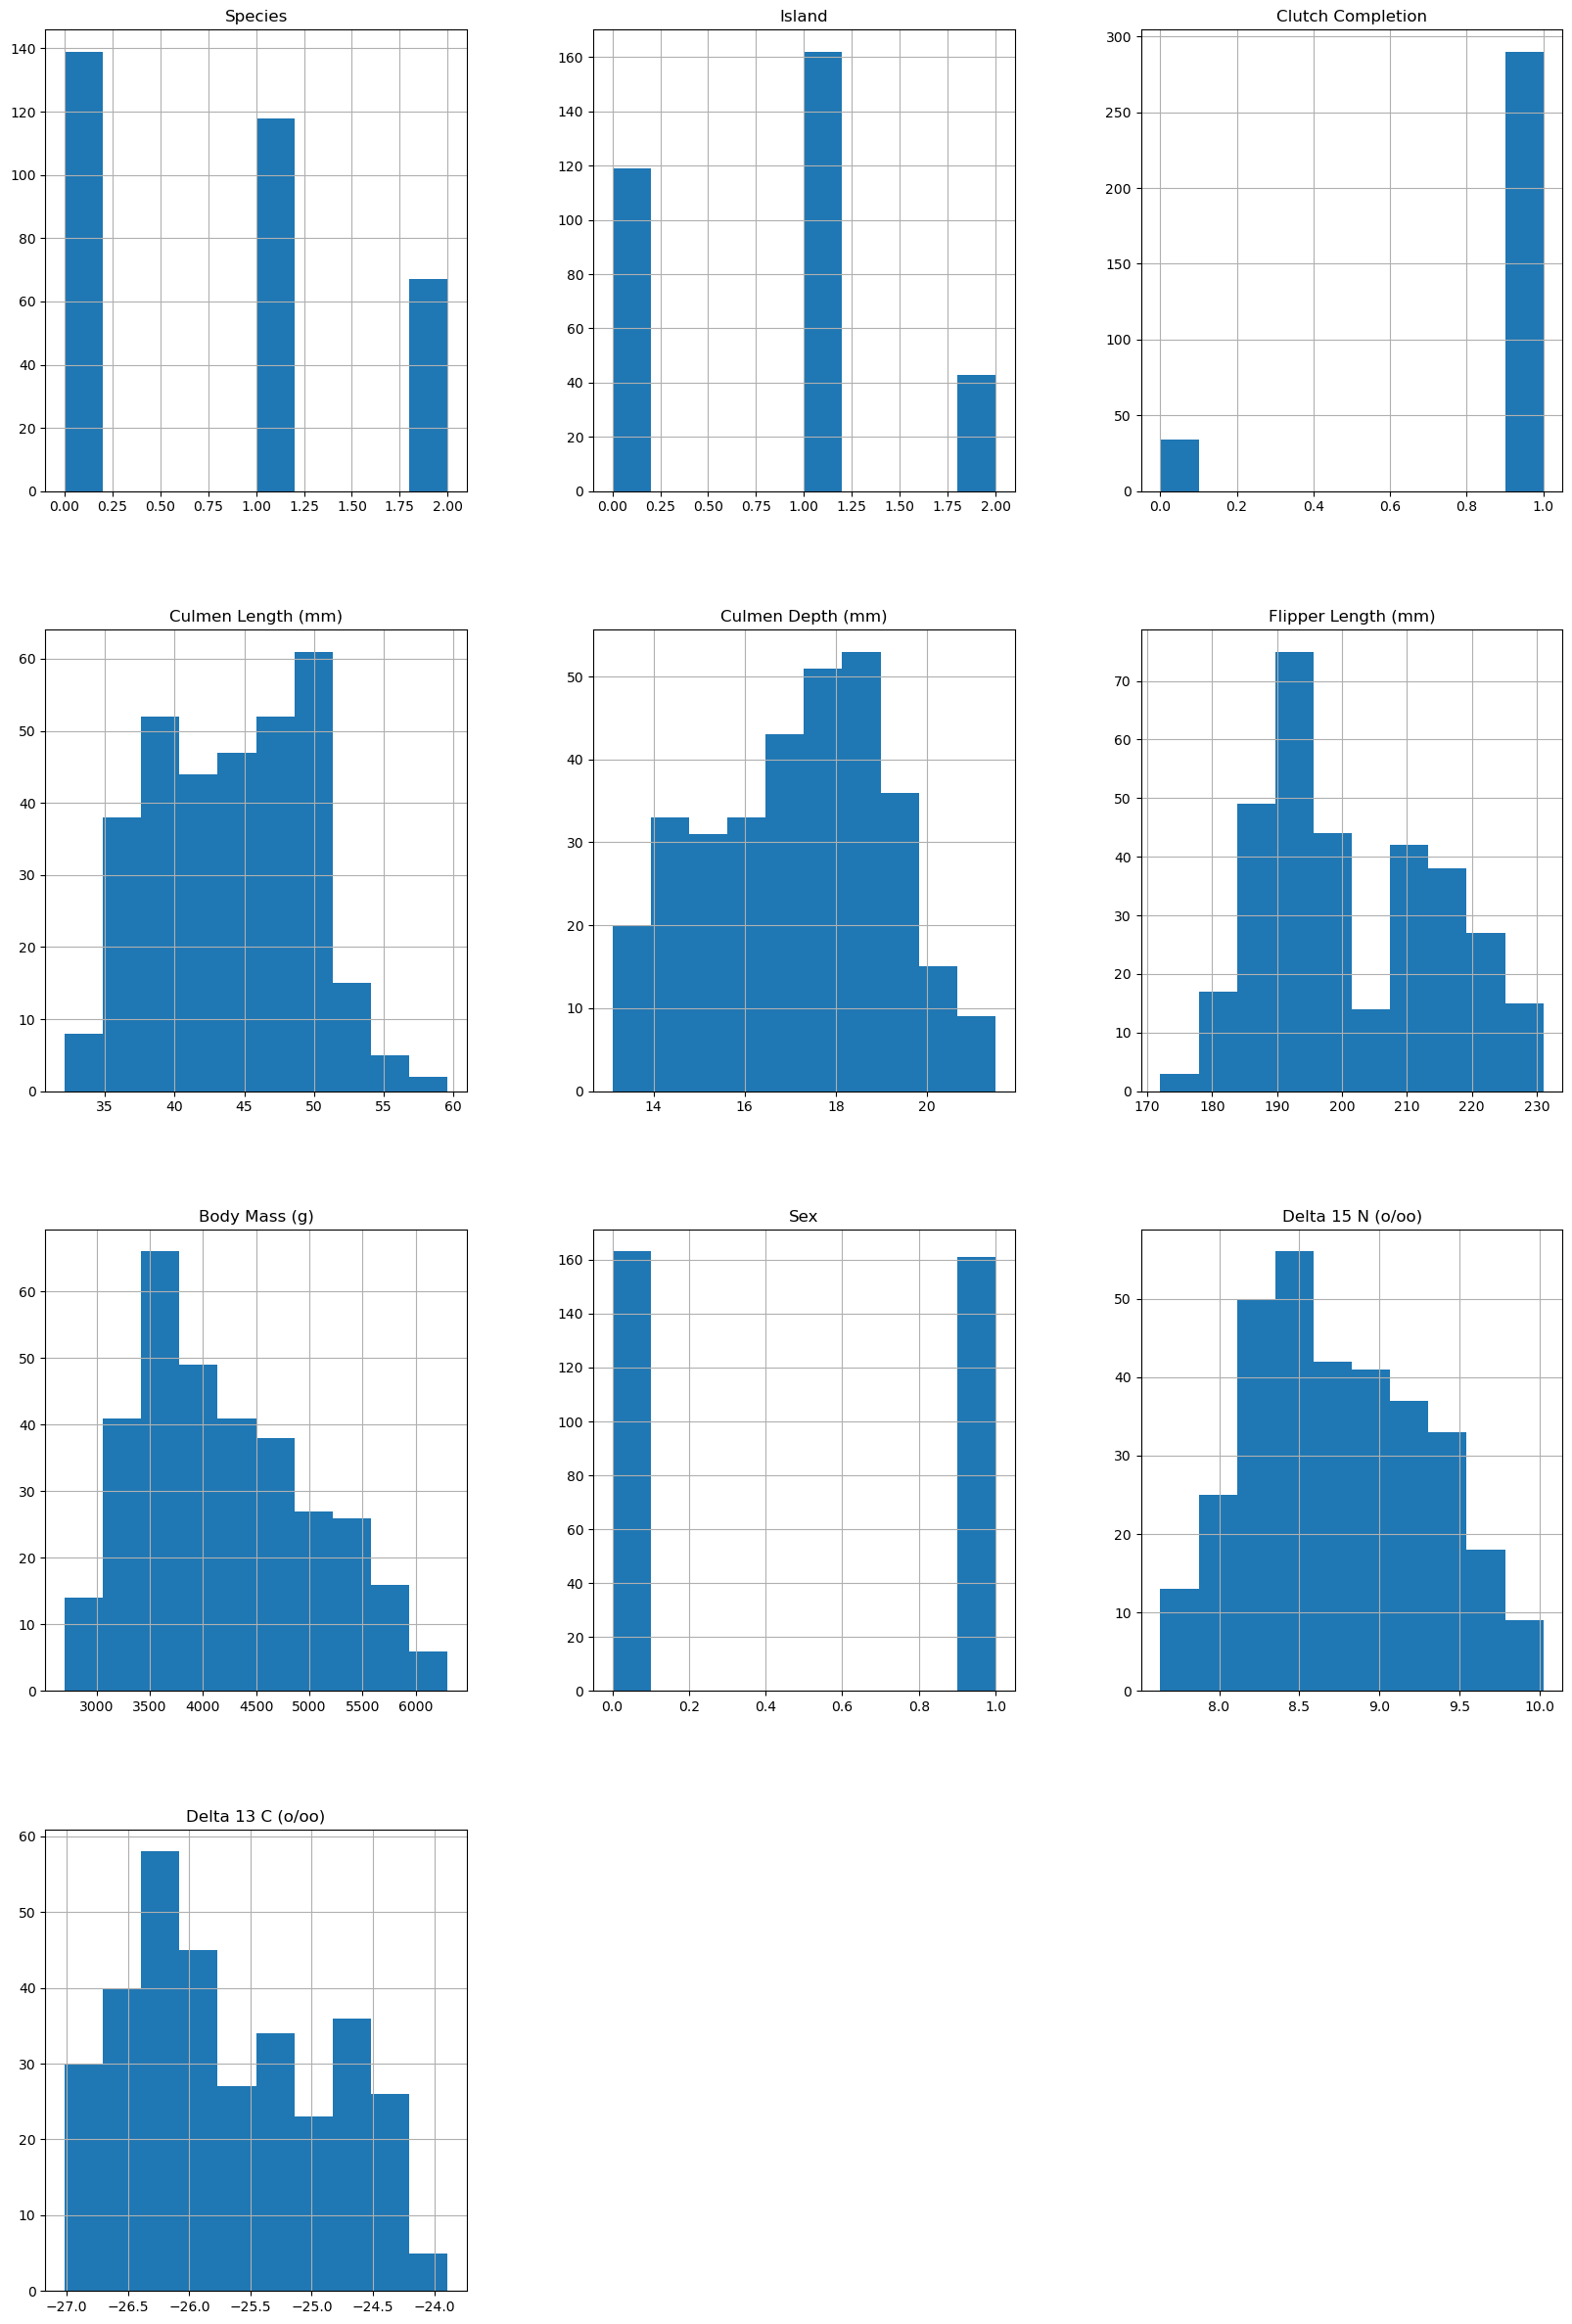

In [44]:
data.hist(figsize=(20,30))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Species'),
  Text(2, 0, 'Island'),
  Text(3, 0, 'Clutch Completion'),
  Text(4, 0, 'Culmen Length (mm)'),
  Text(5, 0, 'Culmen Depth (mm)'),
  Text(6, 0, 'Flipper Length (mm)'),
  Text(7, 0, 'Body Mass (g)'),
  Text(8, 0, 'Sex'),
  Text(9, 0, 'Delta 15 N (o/oo)'),
  Text(10, 0, 'Delta 13 C (o/oo)')])

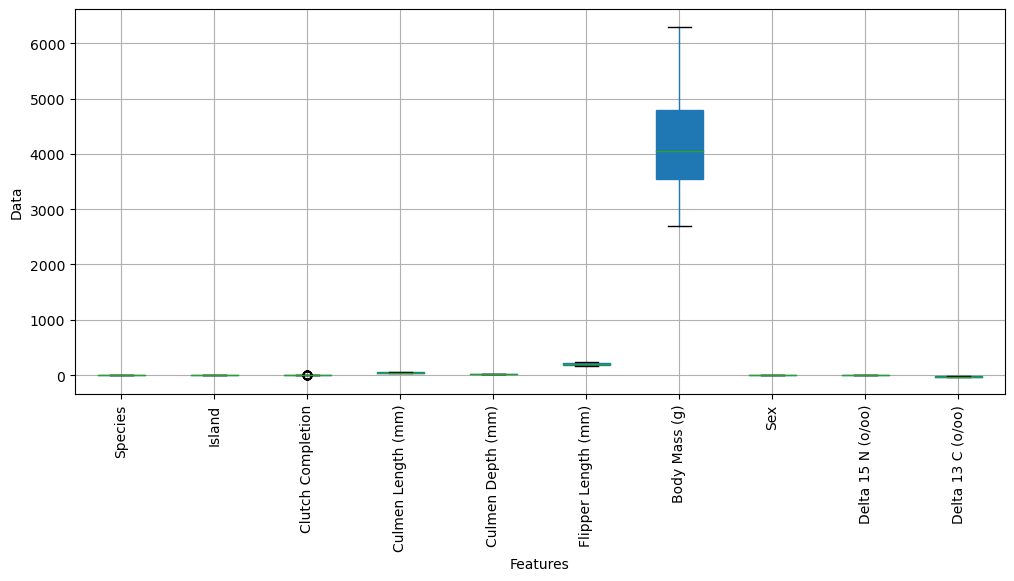

In [45]:
plt.subplots(figsize=(12,5))
data.boxplot(patch_artist=True)
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

In [46]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature,25)
    third_q = np.percentile(feature,75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR
    maximum = third_q + IQR
    flag = False
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True

    if flag == True:
       return "It has outliers. values sould be between {} to {} but min value is {} and max value is {}".format(minimum,maximum,np.min(feature),np.max(feature))
    if flag == False:
       return "This feature deosn't have any outliers"
for i in range(len(data.columns)):
       print(data.columns[i] +" : "+ detect_outlier(data[data.columns[i]]) + "\n")

Species : This feature deosn't have any outliers

Island : This feature deosn't have any outliers

Clutch Completion : It has outliers. values sould be between 1.0 to 1.0 but min value is 0 and max value is 1

Culmen Length (mm) : This feature deosn't have any outliers

Culmen Depth (mm) : This feature deosn't have any outliers

Flipper Length (mm) : This feature deosn't have any outliers

Body Mass (g) : This feature deosn't have any outliers

Sex : This feature deosn't have any outliers

Delta 15 N (o/oo) : This feature deosn't have any outliers

Delta 13 C (o/oo) : This feature deosn't have any outliers



In [47]:
minimum = 0
maximum = 0

for i in range(len(data.columns)):
    first_q = np.percentile(data[data.columns[i]],25)
    third_q = np.percentile(data[data.columns[i]],75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR
    maximum = third_q + IQR

    print("{} has {} outliers".format(data.columns[i],str((data[data.columns[i]] < minimum).sum() + (data[data.columns[i]] > maximum).sum())))
                                      

Species has 0 outliers
Island has 0 outliers
Clutch Completion has 34 outliers
Culmen Length (mm) has 0 outliers
Culmen Depth (mm) has 0 outliers
Flipper Length (mm) has 0 outliers
Body Mass (g) has 0 outliers
Sex has 0 outliers
Delta 15 N (o/oo) has 0 outliers
Delta 13 C (o/oo) has 0 outliers


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Species'),
  Text(2, 0, 'Island'),
  Text(3, 0, 'Clutch Completion'),
  Text(4, 0, 'Culmen Length (mm)'),
  Text(5, 0, 'Culmen Depth (mm)'),
  Text(6, 0, 'Flipper Length (mm)'),
  Text(7, 0, 'Body Mass (g)'),
  Text(8, 0, 'Sex'),
  Text(9, 0, 'Delta 15 N (o/oo)'),
  Text(10, 0, 'Delta 13 C (o/oo)')])

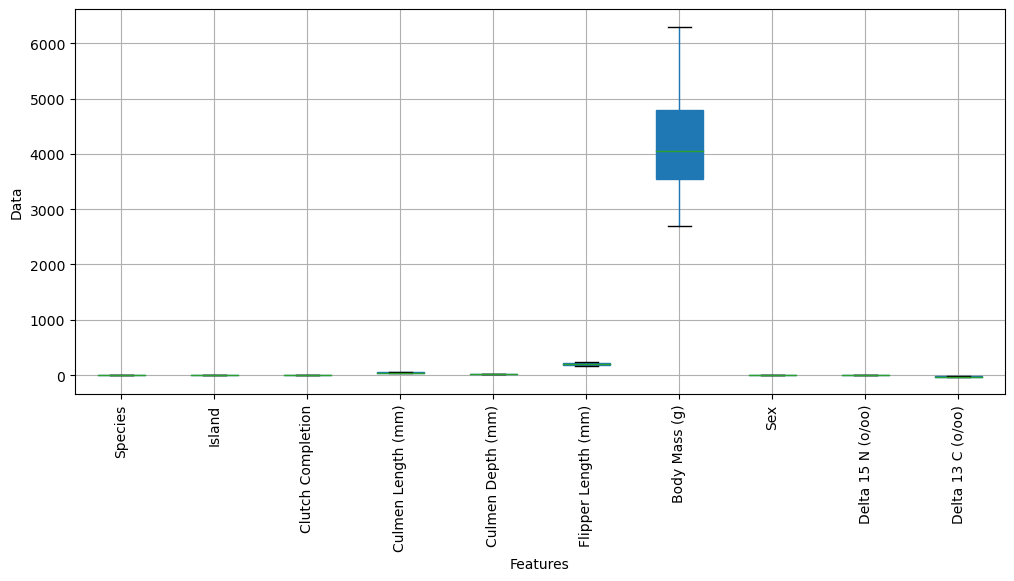

In [48]:
def remove_outlier(feature):
    first_q = np.percentile(data[feature], 25)
    third_q = np.percentile(data[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5

    minimum = first_q - IQR
    maximum = third_q + IQR

    median = data[feature].mean()
    """
    any value beyond the acceptance range are considered as outliers.
    we replace the outliers with the median value of that feature.

    """
    data.loc[data[feature] < minimum, feature] = median
    data.loc[data[feature] > maximum, feature] = median
for i in range(50):
    for i in range(len(data.columns)):
        remove_outlier(data.columns[i])
plt.subplots(figsize=(12,5))
data.boxplot(patch_artist = True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

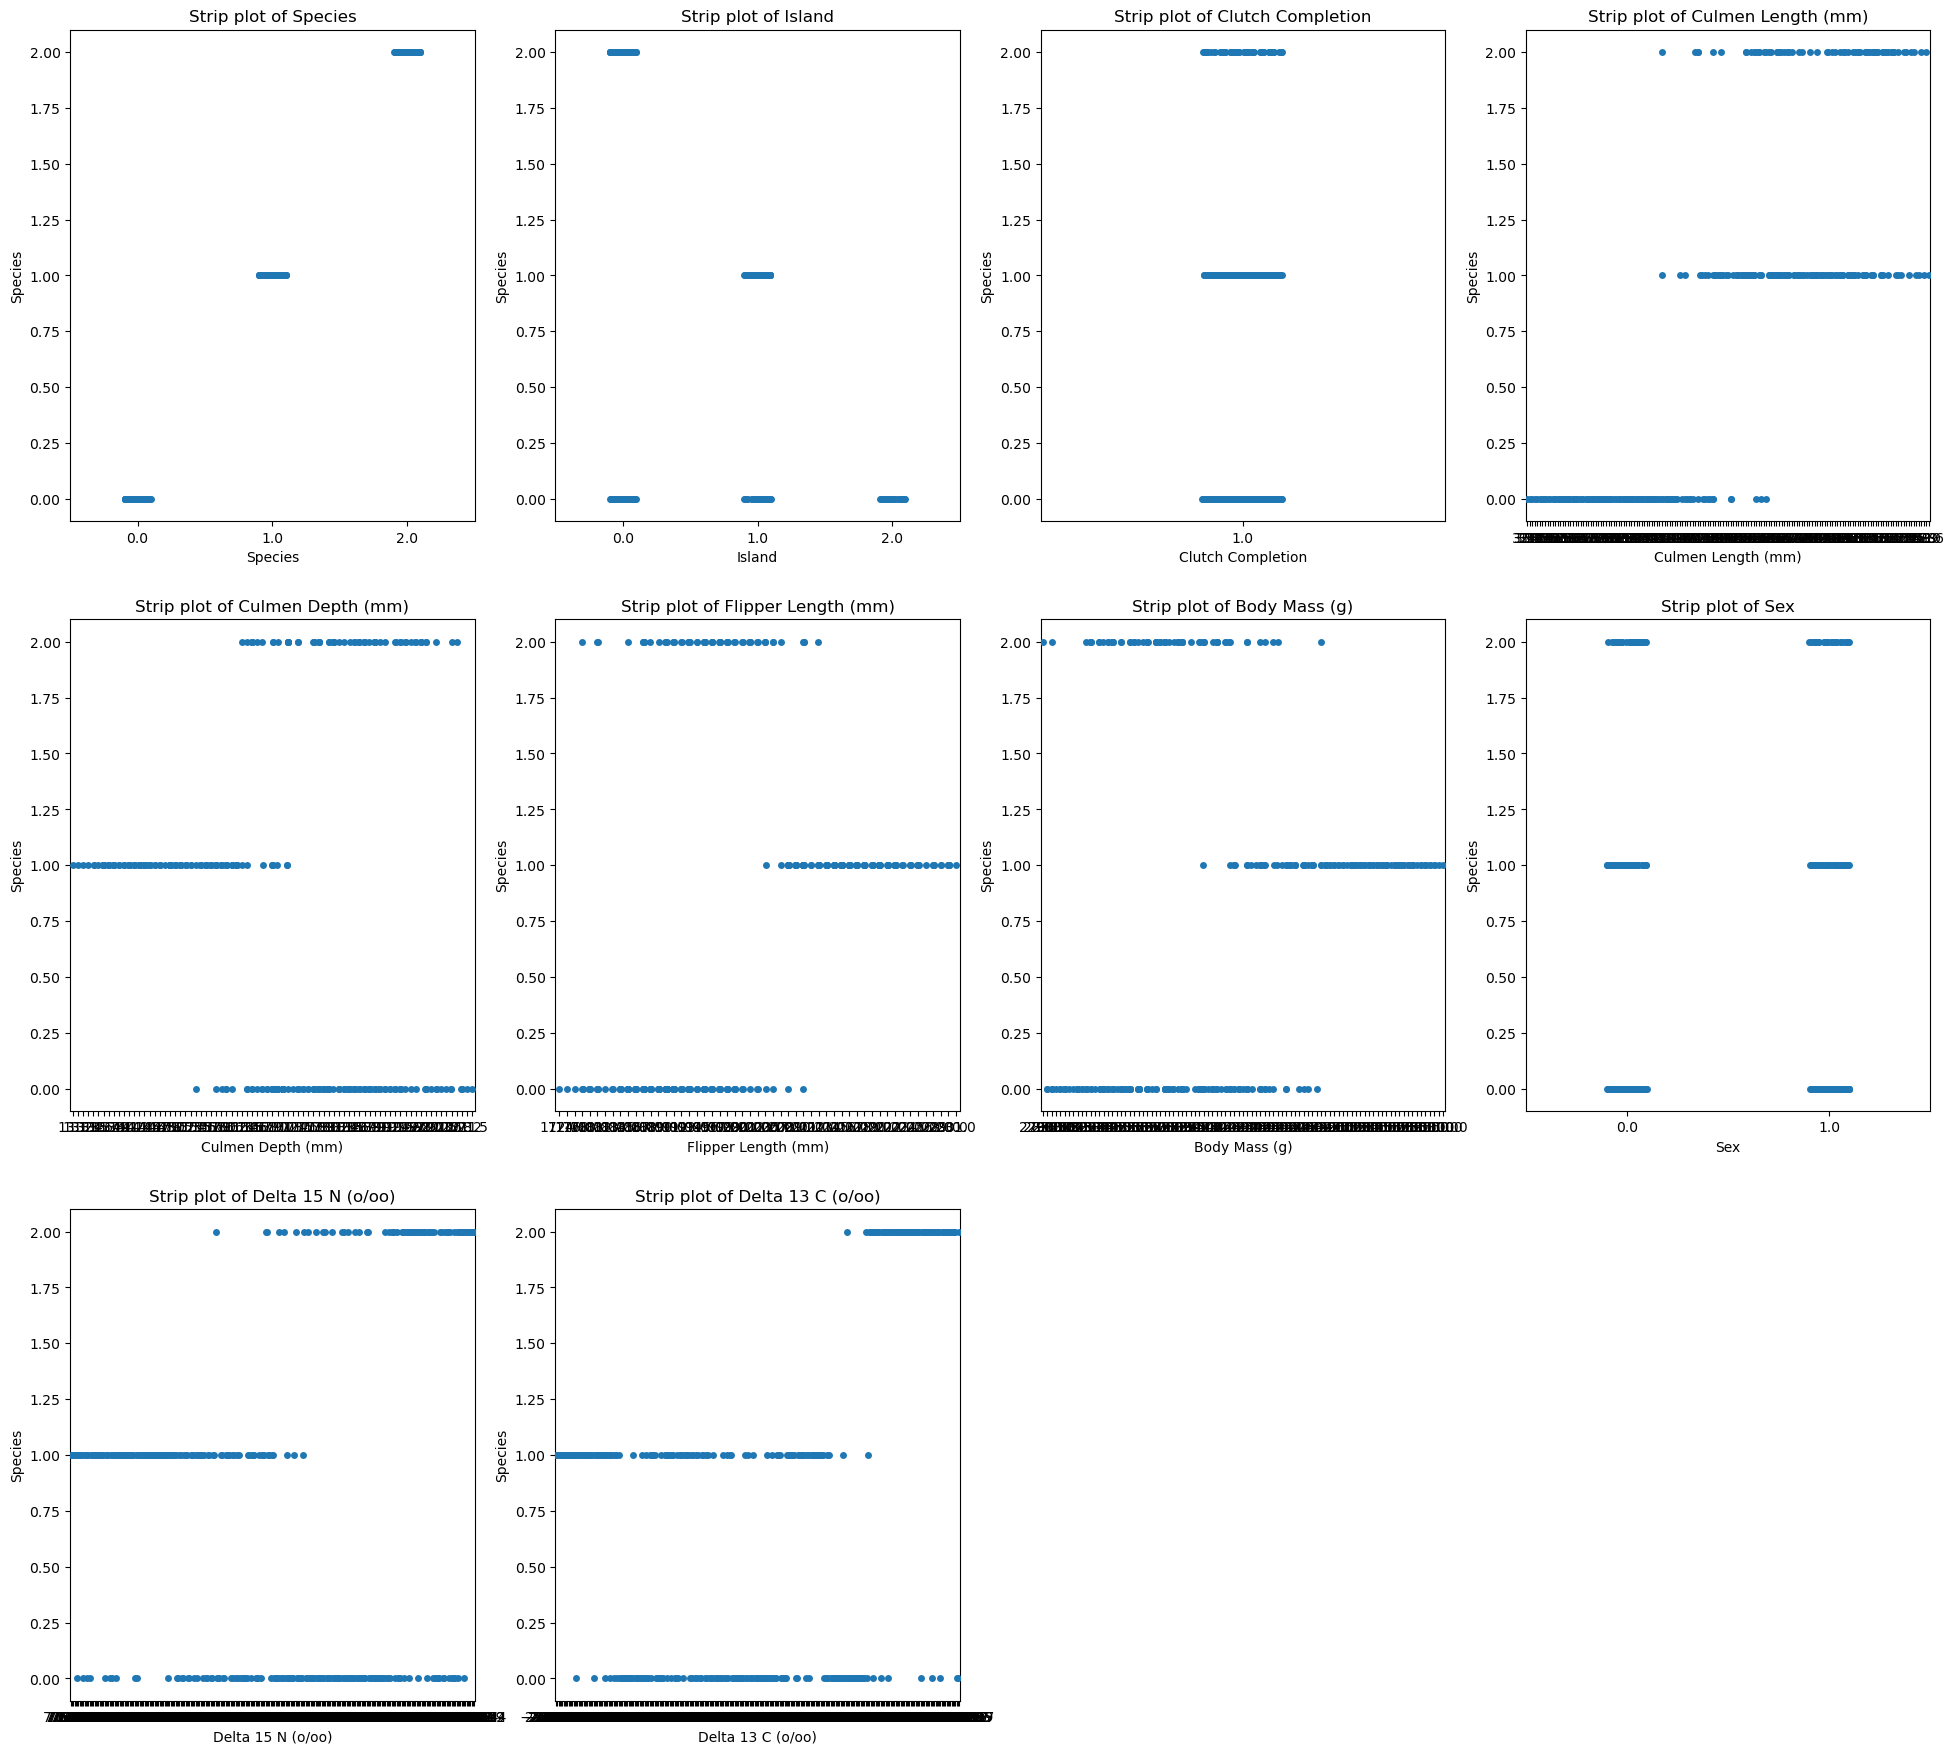

In [49]:
plt.figure(figsize = (24, 60))
col_count = 1
for col in data:
    plt.subplot(8, 4, col_count)
    sns.stripplot(data = data, x = col, y = data["Species"])
    plt.title(f'Strip plot of {col}')
    col_count += 1

Text(0.5, 1.0, 'Heatmap of correlation between features')

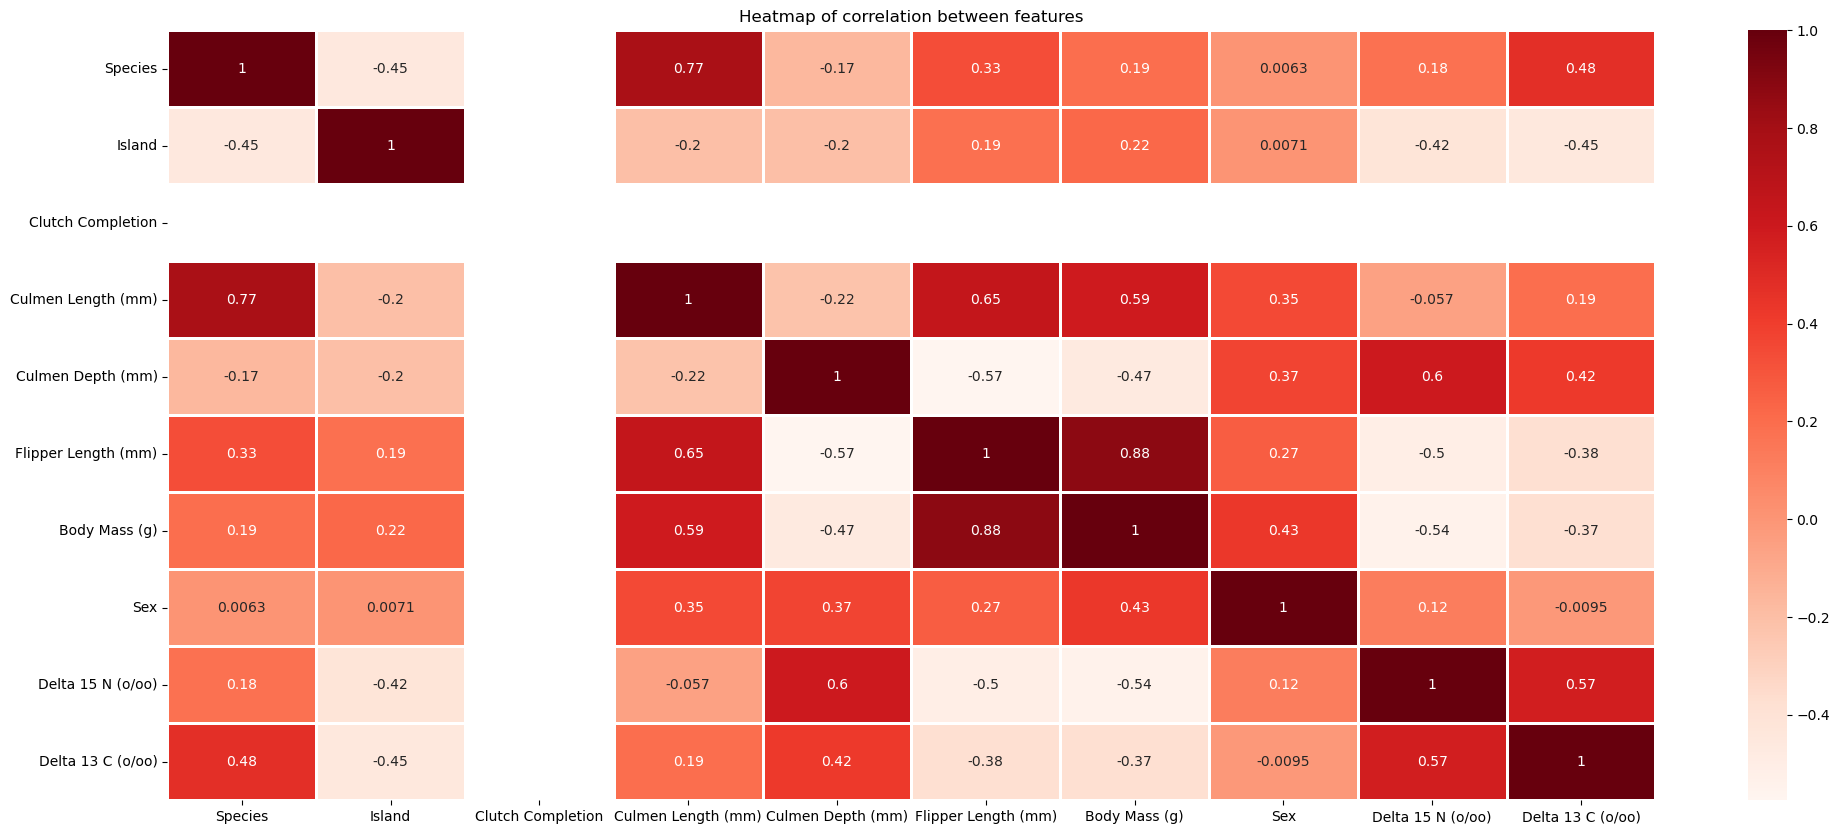

In [50]:
fig, ax = plt.subplots(figsize = (24, 10))
cor = data.corr()
sns.heatmap(cor , linewidths = 1, cmap = plt.cm.Reds, ax = ax, annot = True, cbar=True)
plt.title('Heatmap of correlation between features')

In [51]:
cor_target = abs(cor["Species"])
relevant_features = cor_target[cor_target>0.3]
relevant_features

Species                1.000000
Island                 0.452479
Culmen Length (mm)     0.772948
Flipper Length (mm)    0.330411
Delta 13 C (o/oo)      0.475317
Name: Species, dtype: float64

In [52]:
data_x = data.drop("Species", axis = 1)

In [53]:
x=data_x
y=data["Species"]

In [54]:
s = StandardScaler()
x= s.fit_transform(x)

In [55]:
pca = PCA(n_components = 9)
pca.fit(x)
X = pca.transform(x)
X = pd.DataFrame(X,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.294184,1.326504,0.229535,2.106662,0.075165,0.436188,0.173559,0.396889,5.294804e-17
1,-0.696482,1.801865,0.437568,1.636629,0.473236,-0.523246,0.050361,-0.508393,5.954780e-17
2,-1.366229,1.760944,0.970868,1.501141,0.162112,-0.304439,0.753404,-0.220419,1.680832e-16
3,-1.224752,0.438481,2.423542,1.243627,0.693967,-0.175513,0.008358,-0.300636,2.051996e-16
4,-1.637644,1.579504,0.572197,1.721499,-0.435788,0.165685,0.018730,0.616943,3.709549e-17


In [56]:
X_learn, X_test, Y_learn, Y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)


In [57]:
krange = range(2, 20)
accuracy = []
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_learn, Y_learn)

    Y_pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracy.append(acc)

for i in range(len(krange)):
    print('For k = %i Accuracy is %f' %(krange[i], accuracy[i]))

best_k = krange[accuracy.index(max(accuracy))]
print("Best K:", best_k)

For k = 2 Accuracy is 1.000000
For k = 3 Accuracy is 1.000000
For k = 4 Accuracy is 1.000000
For k = 5 Accuracy is 1.000000
For k = 6 Accuracy is 1.000000
For k = 7 Accuracy is 1.000000
For k = 8 Accuracy is 1.000000
For k = 9 Accuracy is 1.000000
For k = 10 Accuracy is 1.000000
For k = 11 Accuracy is 1.000000
For k = 12 Accuracy is 1.000000
For k = 13 Accuracy is 1.000000
For k = 14 Accuracy is 1.000000
For k = 15 Accuracy is 1.000000
For k = 16 Accuracy is 1.000000
For k = 17 Accuracy is 1.000000
For k = 18 Accuracy is 1.000000
For k = 19 Accuracy is 1.000000
Best K: 2


In [58]:
k = 2
kf = KFold(n_splits=k, random_state=None)

accuracy of each fold - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Avg accuracy : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00        21
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



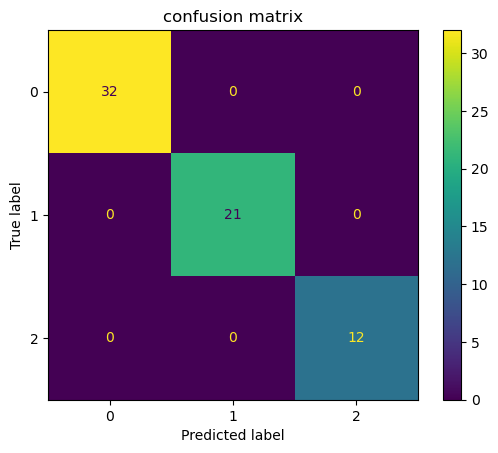

In [59]:
# KNN Classification
knn = KNeighborsClassifier(n_neighbors=2 , metric = 'minkowski')
acc_score1 = []

for train_index , val_index in kf.split(X_learn):
    X_train , X_val = X_learn.iloc[train_index,:], X_learn.iloc[val_index,:]
    Y_train , Y_val = Y_learn.iloc[train_index] , Y_learn.iloc[val_index]

    knn.fit(X_train, Y_train)
    Y_pred1_val = knn.predict(X_val)
    acc = accuracy_score(Y_val , Y_pred1_val)
    acc_score1.append(acc)

avg_acc_score1 = sum(acc_score1)/k

print('accuracy of each fold - {}'.format(acc_score1))
print('Avg accuracy : {}'.format(avg_acc_score1))

Y_pred1_test = knn.predict(X_test)

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred1_test))
display.plot()
plt.title(f'confusion matrix')

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred1_test))

accuracy of each fold - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Avg accuracy : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00        21
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



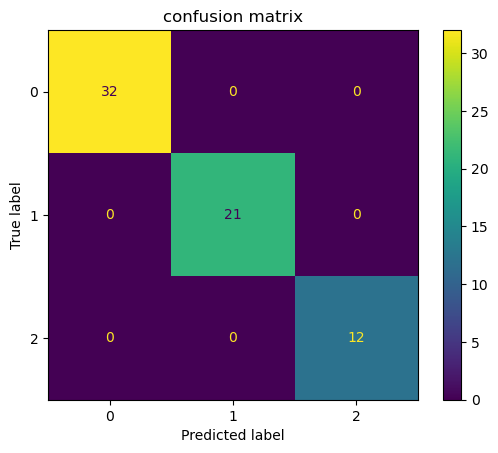

In [60]:
# Random Forest Classification
RF = RandomForestClassifier(n_estimators=50, random_state=42)
acc_score2 = []

for train_index , val_index in kf.split(X_learn):
    X_train , X_val = X_learn.iloc[train_index,:], X_learn.iloc[val_index,:]
    Y_train , Y_val = Y_learn.iloc[train_index] , Y_learn.iloc[val_index]

    RF.fit(X_train, Y_train)
    Y_pred2_val = RF.predict(X_val)
    acc = accuracy_score(Y_val , Y_pred2_val)
    acc_score2.append(acc)

avg_acc_score2 = sum(acc_score2)/k

print('accuracy of each fold - {}'.format(acc_score2))
print('Avg accuracy : {}'.format(avg_acc_score2))
Y_pred2_test = RF.predict(X_test)

display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred2_test))
display.plot()
plt.title(f'confusion matrix')

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred2_test))

accuracy of each fold - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Avg accuracy : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00        21
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



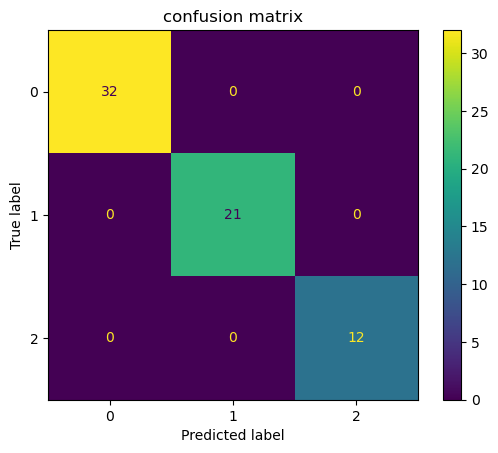

In [61]:
# SVM Classification
SVM = SVC(kernel='rbf')

acc_score3 = []

for train_index , val_index in kf.split(X_learn):
    X_train , X_val = X_learn.iloc[train_index,:], X_learn.iloc[val_index,:]
    Y_train , Y_val = Y_learn.iloc[train_index] , Y_learn.iloc[val_index]

    SVM.fit(X_train ,Y_train)
    Y_pred3 = SVM.predict(X_test)

    acc = accuracy_score(Y_test , Y_pred3)
    acc_score3.append(acc)

avg_acc_score3 = sum(acc_score3)/k

print('accuracy of each fold - {}'.format(acc_score3))
print('Avg accuracy : {}'.format(avg_acc_score3))
Y_pred3_test = SVM.predict(X_test)

display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred3_test))
display.plot()
plt.title(f'confusion matrix')

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred3_test))